In [26]:
import pandas as pd
import json
import matplotlib.pyplot as plt
with open('/home/guest/AdvancedLLMReasoning/math_tutor_model/math_sft_adapter/v2/trainer_state.json', 'r') as f:
    trainer_state = json.load(f)
log_history = trainer_state['log_history']

train_logs = []
val_logs = []

for entry in log_history:
    if 'loss' in entry:  # Training loss
        train_logs.append({
            'step': entry['step'],
            'epoch': entry['epoch'],
            'loss': entry['loss']
        })
    if 'eval_loss' in entry:  # Validation loss
        val_logs.append({
            'step': entry['step'],
            'epoch': entry['epoch'],
            'eval_loss': entry['eval_loss']
        })
train_df = pd.DataFrame(train_logs)
val_df = pd.DataFrame(val_logs)

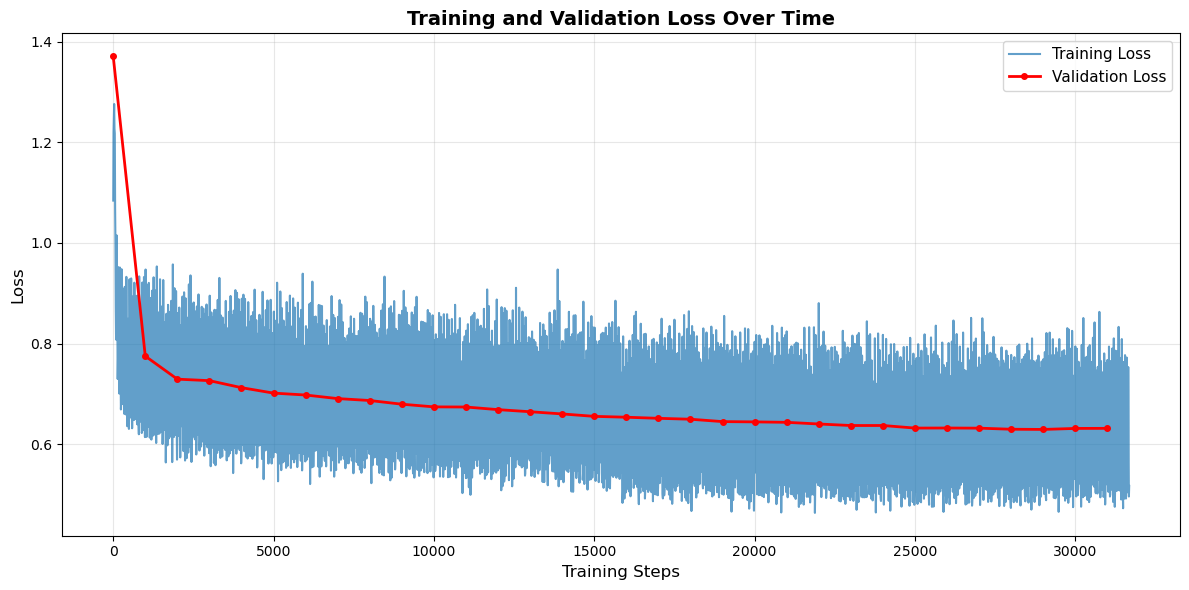


Best checkpoint: math_tutor_model/math_sft_adapter/v2/checkpoint-29000
Best metric (eval_loss): 0.6295
Best global step: 29000


In [27]:
# Visualize training and validation loss
fig, ax = plt.subplots(figsize=(12, 6))

# Plot training loss
ax.plot(train_df['step'], train_df['loss'], label='Training Loss', alpha=0.7, linewidth=1.5)

# Plot validation loss
ax.plot(val_df['step'], val_df['eval_loss'], label='Validation Loss', 
        marker='o', markersize=4, linewidth=2, color='red')

ax.set_xlabel('Training Steps', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Training and Validation Loss Over Time', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print best checkpoint info
print(f"\nBest checkpoint: {trainer_state['best_model_checkpoint']}")
print(f"Best metric (eval_loss): {trainer_state['best_metric']:.4f}")
print(f"Best global step: {trainer_state['best_global_step']}")


In [28]:
# Phân tích chi tiết
print("=" * 70)
print("ĐÁNH GIÁ TRAINING VÀ VALIDATION LOSS")
print("=" * 70)

print(f"\n📊 THỐNG KÊ TỔNG QUAN:")
print(f"   • Tổng training steps: {train_df['step'].max():,}")
print(f"   • Số lần evaluation: {len(val_df)}")
print(f"   • Training epochs: {train_df['epoch'].max():.2f}")

print(f"\n📉 TRAINING LOSS:")
print(f"   • Loss ban đầu: {train_df['loss'].iloc[0]:.4f}")
print(f"   • Loss cuối cùng: {train_df['loss'].iloc[-1]:.4f}")
print(f"   • Loss giảm: {train_df['loss'].iloc[0] - train_df['loss'].iloc[-1]:.4f} ({(1 - train_df['loss'].iloc[-1]/train_df['loss'].iloc[0])*100:.1f}%)")
print(f"   • Loss trung bình cuối (last 1000 steps): {train_df['loss'].tail(100).mean():.4f}")

print(f"\n📈 VALIDATION LOSS:")
print(f"   • Val loss ban đầu: {val_df['eval_loss'].iloc[0]:.4f}")
print(f"   • Val loss tốt nhất: {val_df['eval_loss'].min():.4f} (step {val_df.loc[val_df['eval_loss'].idxmin(), 'step']:.0f})")
print(f"   • Val loss cuối cùng: {val_df['eval_loss'].iloc[-1]:.4f}")
print(f"   • Val loss giảm: {val_df['eval_loss'].iloc[0] - val_df['eval_loss'].iloc[-1]:.4f} ({(1 - val_df['eval_loss'].iloc[-1]/val_df['eval_loss'].iloc[0])*100:.1f}%)")

print(f"\n🔍 OVERFITTING CHECK:")
train_final = train_df['loss'].tail(100).mean()
val_final = val_df['eval_loss'].iloc[-1]
gap = val_final - train_final
print(f"   • Train loss (avg last 100): {train_final:.4f}")
print(f"   • Val loss (final): {val_final:.4f}")
print(f"   • Gap (val - train): {gap:.4f}")

if gap < 0.1:
    print(f"   ✅ Gap nhỏ ({gap:.4f}) - Model generalize tốt!")
elif gap < 0.2:
    print(f"   ⚠️  Gap trung bình ({gap:.4f}) - Có dấu hiệu overfit nhẹ")
else:
    print(f"   ❌ Gap lớn ({gap:.4f}) - Overfit đáng kể!")

print(f"\n💡 CONVERGENCE:")
val_last_5 = val_df['eval_loss'].tail(5)
val_std = val_last_5.std()
print(f"   • Val loss std (last 5 evals): {val_std:.4f}")
if val_std < 0.01:
    print(f"   ✅ Model đã converge (std={val_std:.4f})")
else:
    print(f"   ⚠️  Model vẫn còn biến động (std={val_std:.4f})")


ĐÁNH GIÁ TRAINING VÀ VALIDATION LOSS

📊 THỐNG KÊ TỔNG QUAN:
   • Tổng training steps: 31,680
   • Số lần evaluation: 32
   • Training epochs: 2.00

📉 TRAINING LOSS:
   • Loss ban đầu: 1.0841
   • Loss cuối cùng: 0.5172
   • Loss giảm: 0.5669 (52.3%)
   • Loss trung bình cuối (last 1000 steps): 0.5997

📈 VALIDATION LOSS:
   • Val loss ban đầu: 1.3710
   • Val loss tốt nhất: 0.6295 (step 29000)
   • Val loss cuối cùng: 0.6316
   • Val loss giảm: 0.7394 (53.9%)

🔍 OVERFITTING CHECK:
   • Train loss (avg last 100): 0.5997
   • Val loss (final): 0.6316
   • Gap (val - train): 0.0319
   ✅ Gap nhỏ (0.0319) - Model generalize tốt!

💡 CONVERGENCE:
   • Val loss std (last 5 evals): 0.0011
   ✅ Model đã converge (std=0.0011)
